Notebook to tune random forest classifier

In [1]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt
import warnings
from k_fold import custom_k_fold, k_fold_cross_validation

In [2]:
df = pd.read_csv('../data/spambase_augmented.csv')

In [3]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
print('df shape : ' , df.shape)
print('X shape : ' , X.shape)
print('y shape : ', y.shape)

df shape :  (4600, 1186)
X shape :  (4600, 1185)
y shape :  (4600,)


Split Data

In [4]:
from sklearn.model_selection import train_test_split

# Split dataset before tuning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Estimators Used

In [5]:
n_estimators_list = [10, 50, 100, 200, 300, 500, 700, 1000, 1500, 2000]

Tune Random Forest

In [6]:
rf_errors = {}
best_n_rf = None
best_rf_error = float('inf')

print("Tuning Random Forests...")

for n in n_estimators_list:
    model = RandomForestClassifier(n_estimators=n, max_features="sqrt", criterion="gini",n_jobs=-1)

    # Perform k-fold cross-validation on training set only
    val_error = k_fold_cross_validation(X_train, y_train, model, k=5)  
    
    rf_errors[n] = val_error
    print(f"n_estimators={n}, Validation Error: {val_error:.4f}")
    
    if val_error < best_rf_error:
        best_rf_error = val_error
        best_n_rf = n

print(f"\nBest Random Forest: n_estimators={best_n_rf}, Validation Error={best_rf_error:.4f}")

Tuning Random Forests...
n_estimators=10, Validation Error: 0.0524
n_estimators=50, Validation Error: 0.0459
n_estimators=100, Validation Error: 0.0465
n_estimators=200, Validation Error: 0.0457
n_estimators=300, Validation Error: 0.0470
n_estimators=500, Validation Error: 0.0478
n_estimators=700, Validation Error: 0.0462
n_estimators=1000, Validation Error: 0.0492
n_estimators=1500, Validation Error: 0.0462
n_estimators=2000, Validation Error: 0.0470

Best Random Forest: n_estimators=200, Validation Error=0.0457


Tune AdaBoost with Decision Tree Stumps (This took one hour)

In [9]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings("ignore")
ada_errors = {}
best_n_ada = None
best_ada_error = float('inf')

print("\nTuning AdaBoost...")

for n in n_estimators_list:
    model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=n)

    # Perform k-fold cross-validation on training set only
    val_error = k_fold_cross_validation(X_train, y_train, model, k=5)  
    
    ada_errors[n] = val_error
    print(f"n_estimators={n}, Validation Error: {val_error:.4f}")
    
    if val_error < best_ada_error:
        best_ada_error = val_error
        best_n_ada = n

print(f"\nBest AdaBoost: n_estimators={best_n_ada}, Validation Error={best_ada_error:.4f}")


Tuning AdaBoost...
n_estimators=10, Validation Error: 0.0693
n_estimators=50, Validation Error: 0.0535
n_estimators=100, Validation Error: 0.0533
n_estimators=200, Validation Error: 0.0543
n_estimators=300, Validation Error: 0.0481
n_estimators=500, Validation Error: 0.0530
n_estimators=700, Validation Error: 0.0533
n_estimators=1000, Validation Error: 0.0644
n_estimators=1500, Validation Error: 0.0549
n_estimators=2000, Validation Error: 0.0552

Best AdaBoost: n_estimators=300, Validation Error=0.0481


Visualizing Difference

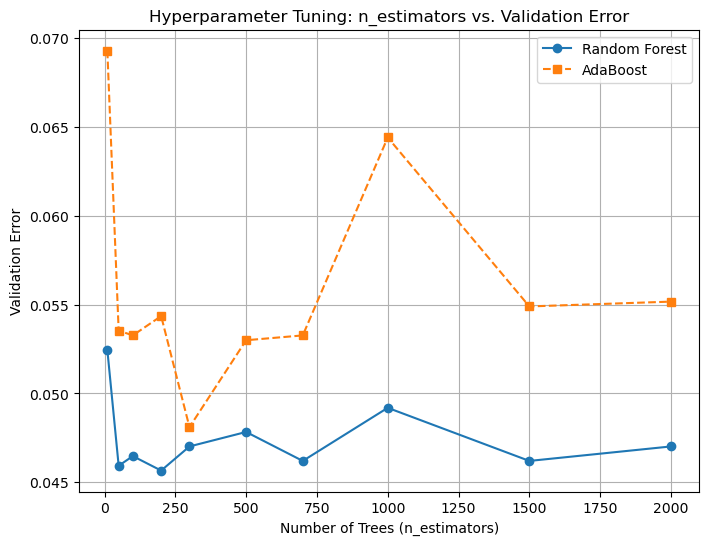

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(list(rf_errors.keys()), list(rf_errors.values()), marker='o', linestyle='-', label="Random Forest")
plt.plot(list(ada_errors.keys()), list(ada_errors.values()), marker='s', linestyle='--', label="AdaBoost")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Validation Error")
plt.title("Hyperparameter Tuning: n_estimators vs. Validation Error")
plt.legend()
plt.grid(True)
plt.show()


In [11]:
print("Random Forest Errors")
for k,v in rf_errors.items():
    print(f"ensemble size : {k}")
    print(f"Error : {v}")
    print('----------------------')

print('===============================')
print("AdaBoost Errors")
for k,v in ada_errors.items():
    print(f"ensemble size : {k}")
    print(f"Error : {v}")
    print('----------------------')

Random Forest Errors
ensemble size : 10
Error : 0.05244565217391304
----------------------
ensemble size : 50
Error : 0.04592391304347827
----------------------
ensemble size : 100
Error : 0.04646739130434785
----------------------
ensemble size : 200
Error : 0.04565217391304348
----------------------
ensemble size : 300
Error : 0.047010869565217384
----------------------
ensemble size : 500
Error : 0.047826086956521754
----------------------
ensemble size : 700
Error : 0.04619565217391306
----------------------
ensemble size : 1000
Error : 0.04918478260869563
----------------------
ensemble size : 1500
Error : 0.04619565217391306
----------------------
ensemble size : 2000
Error : 0.047010869565217404
----------------------
AdaBoost Errors
ensemble size : 10
Error : 0.06929347826086958
----------------------
ensemble size : 50
Error : 0.05353260869565217
----------------------
ensemble size : 100
Error : 0.0532608695652174
----------------------
ensemble size : 200
Error : 0.054347826

Comparing models with optimal parameters

In [13]:
print(best_n_rf)
print(best_n_ada)

200
300


In [15]:
# Train final Random Forest model
final_rf_model = RandomForestClassifier(n_estimators=best_n_rf, max_features="sqrt", criterion="gini")
final_rf_model.fit(X_train, y_train)

# Train final AdaBoost model
final_ada_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), 
                                     n_estimators=best_n_ada)
final_ada_model.fit(X_train, y_train)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=300)

In [16]:
# Evaluate Random Forest
rf_test_preds = final_rf_model.predict(X_test)
rf_test_error = 1 - accuracy_score(y_test, rf_test_preds)

# Evaluate AdaBoost
ada_test_preds = final_ada_model.predict(X_test)
ada_test_error = 1 - accuracy_score(y_test, ada_test_preds)

# Print final comparison
print(f"\nFinal Test Errors:")
print(f"Random Forest Test Error: {rf_test_error:.4f}")
print(f"AdaBoost Test Error: {ada_test_error:.4f}")


Final Test Errors:
Random Forest Test Error: 0.0641
AdaBoost Test Error: 0.0696
